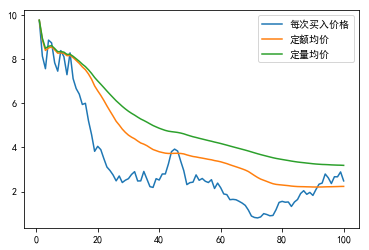

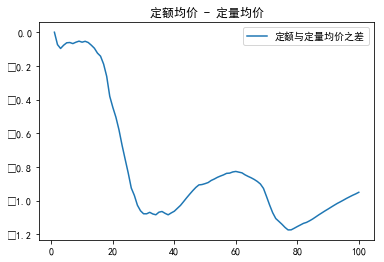

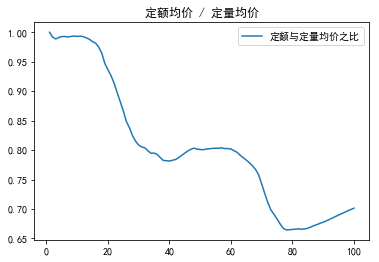

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
font_name = 'SimHei' 
plt.rcParams['font.family'] = font_name

# 模拟股价
def f_price(ndays=100):
    '''
    股票价格的对数收益率服从正态分布
    '''
    rand_data = np.random.random(ndays)
    rand_data_ppf = stats.norm.ppf(rand_data, 0, 0.1)
    # 模拟出来的价格列表，作为买入价，要足够用
    price_list = 10 * np.exp(rand_data_ppf.cumsum())
    
    return price_list

# de 定额
# dl 定量
# 定投的天数ndays

price_list = f_price(100)
df = pd.DataFrame({'price': price_list})
df['price_reciprocal'] = df.price.apply(lambda x: 1/x)
df['ndays'] = df.index + 1
df['dl_mean_price'] = df.price.cumsum() /  df.ndays  # 定额投在定投到n天的均价
df['de_mean_price'] = df.ndays / df.price_reciprocal.cumsum() # 定量投在定投到n天的均价
df['de_dl_price_diff'] = df.de_mean_price - df.dl_mean_price
df['de_dl_price_ratio'] = df.de_mean_price / df.dl_mean_price
df.head()

plt.plot(df.ndays, df.price, label='每次买入价格')
# plt.title('模拟股价波动趋势')
plt.plot(df.ndays, df.de_mean_price, label='定额均价')
plt.plot(df.ndays, df.dl_mean_price, label='定量均价')
plt.legend(loc='best')
# plt.title("定额和定量的均价随着定投天数增加变化趋势")
plt.show()


plt.plot(df.ndays, df.de_dl_price_diff, label='定额与定量均价之差')
plt.title('定额均价 - 定量均价')
plt.legend(loc='best')
plt.show()

plt.plot(df.ndays, df.de_dl_price_ratio, label='定额与定量均价之比')
plt.title('定额均价 / 定量均价')
plt.legend(loc='best')
plt.show()
